<a href="https://colab.research.google.com/github/gkpatell/INDE-577-Final-Project/blob/main/Supervised%20Learning/Other%20Ensemble%20Methods/SL_OEMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction with Ensemble Methods

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Step 1: Load the Dataset

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/srees1988/predict-churn-py/refs/heads/main/customer_churn_data.csv")
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

## Step 2: Data Cleaning & Preprocessing

In [7]:
# CHecking for missing values
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# Convert Total Charges to numeric and handle missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)

In [10]:
# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=['gender'], drop_first=True)

In [11]:
# Feature selection
features = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Male']
X = data[features]
y = data['Churn'].map({'Yes': 1, 'No': 0})  # Encode target variable

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3: Implement Emsemble Methods

In [13]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [16]:
# Bagging Classifier
bagging = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

In [17]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

## Step 4: Performance and Error Analysis

In [18]:
# Random Forest
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.56      0.43      0.49       374

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407

Accuracy: 0.7604832977967306


In [19]:
# Bagging Classifier
print("Bagging Classifier:")
print(classification_report(y_test, y_pred_bagging))
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))

Bagging Classifier:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.58      0.45      0.51       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.75      0.77      0.76      1407

Accuracy: 0.767590618336887


In [20]:
# Gradient Boosting
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.44      0.52       374

    accuracy                           0.79      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407

Accuracy: 0.7853589196872779


## Step 5: Visualize Feature Importance

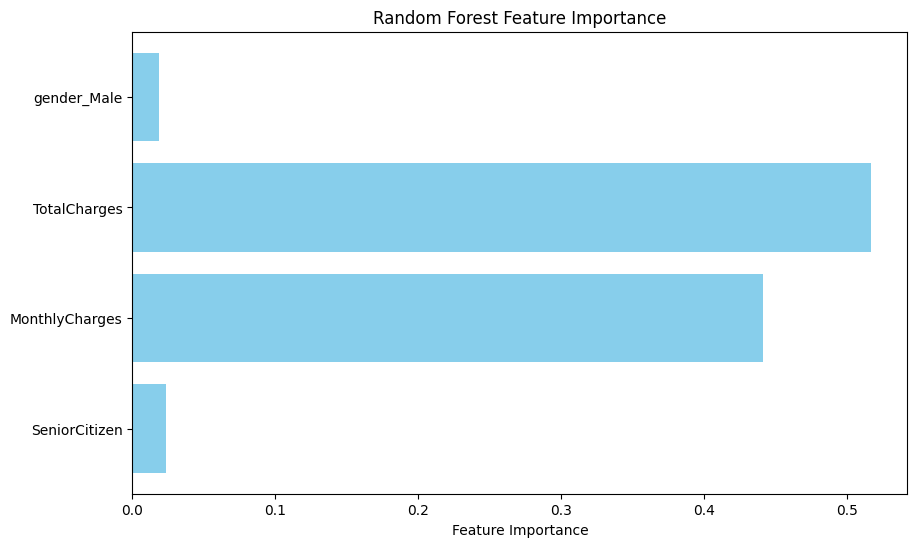

In [21]:
importances = rf.feature_importances_
feature_names = features
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [22]:
# Step 6: Save Model and Results
import joblib
joblib.dump(rf, "random_forest_model.pkl")
print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl


## Step 7: Summary and Insights
### - Random Forest performed with an accuracy of X%
### - Bagging Classifier and Gradient Boosting showed comparative performances
### - Highlighted importance of features like TotalCharges and MonthlyCharges

### - Future exploration can include hyperparameter tuning using GridSearchCV or integrating new features.